In [1]:
import uproot
import awkward as ak
import numpy as np
import time
import coffea

print(coffea.__version__)
from coffea import util
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema


0.7.16


In [2]:
redirector = 'root://cmsxrootd.fnal.gov/'
filename_2016 = '/store/data/Run2016B/JetHT/NANOAOD/ver1_HIPM_UL2016_MiniAODv2_NanoAODv9-v2/2430000/341EF3A8-3C77-8C4F-A0F6-A71CCB9FAF37.root'
filename_2017 = '/store/data/Run2017F/JetHT/NANOAOD/UL2017_MiniAODv2_NanoAODv9-v1/120000/0601305F-2F0F-F04F-B450-97422C843C9F.root'
filename_2018 = '/store/data/Run2018C/JetHT/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v1/130000/0AAA356D-7531-CD40-A4B1-A12F77FF2652.root'
jetht = uproot.open(redirector + filename_2016)

events = NanoEventsFactory.from_root(redirector + filename_2016, schemaclass=NanoAODSchema).events()

In [3]:
print(events.fields)
fatjets = events.FatJet
print(events.HLT.fields)

['run', 'OtherPV', 'SoftActivityJetHT2', 'Tau', 'MET', 'HLTriggerFirstPath', 'SoftActivityJetNjets5', 'RawPuppiMET', 'Muon', 'SV', 'L1Reco', 'TrigObj', 'HLT', 'CorrT1METJet', 'luminosityBlock', 'fixedGridRhoFastjetCentralNeutral', 'Flag', 'event', 'Proton', 'Photon', 'Jet', 'SoftActivityJetHT10', 'fixedGridRhoFastjetCentral', 'LowPtElectron', 'SoftActivityJetNjets2', 'L1', 'SoftActivityJetHT5', 'FsrPhoton', 'L1PreFiringWeight', 'ChsMET', 'boostedTau', 'fixedGridRhoFastjetCentralChargedPileUp', 'PV', 'Electron', 'SoftActivityJet', 'fixedGridRhoFastjetCentralCalo', 'SoftActivityJetHT', 'DeepMETResponseTune', 'CaloMET', 'SubJet', 'RawMET', 'PPSLocalTrack', 'TkMET', 'FatJet', 'fixedGridRhoFastjetAll', 'HLTriggerFinalPath', 'IsoTrack', 'PuppiMET', 'DeepMETResolutionTune', 'SoftActivityJetNjets10']
['AK8PFJet360_TrimMass30', 'AK8PFHT700_TrimR0p1PT0p03Mass50', 'AK8PFHT650_TrimR0p1PT0p03Mass50', 'AK8PFHT600_TrimR0p1PT0p03Mass50_BTagCSV_p20', 'CaloJet500_NoJetID', 'Dimuon13_PsiPrime', 'Dimuon13

In [4]:
# from coffea.lookup_tools import extractor
# ext = extractor()
###figure out how to do everything within coffea


In [5]:
#### uproot notation
# jetht.keys()
# uprootevents = jetht['Events']
# uprootevents.keys('HLT_PFJet*')
# uprootevents.keys('FatJet*')
# uprootevents.show()
#make a separate hist for each of these. start at highest

['FatJet_area',
 'FatJet_btagCSVV2',
 'FatJet_btagDDBvLV2',
 'FatJet_btagDDCvBV2',
 'FatJet_btagDDCvLV2',
 'FatJet_btagDeepB',
 'FatJet_btagHbb',
 'FatJet_deepTagMD_H4qvsQCD',
 'FatJet_deepTagMD_HbbvsQCD',
 'FatJet_deepTagMD_TvsQCD',
 'FatJet_deepTagMD_WvsQCD',
 'FatJet_deepTagMD_ZHbbvsQCD',
 'FatJet_deepTagMD_ZHccvsQCD',
 'FatJet_deepTagMD_ZbbvsQCD',
 'FatJet_deepTagMD_ZvsQCD',
 'FatJet_deepTagMD_bbvsLight',
 'FatJet_deepTagMD_ccvsLight',
 'FatJet_deepTag_H',
 'FatJet_deepTag_QCD',
 'FatJet_deepTag_QCDothers',
 'FatJet_deepTag_TvsQCD',
 'FatJet_deepTag_WvsQCD',
 'FatJet_deepTag_ZvsQCD',
 'FatJet_eta',
 'FatJet_mass',
 'FatJet_msoftdrop',
 'FatJet_n2b1',
 'FatJet_n3b1',
 'FatJet_particleNetMD_QCD',
 'FatJet_particleNetMD_Xbb',
 'FatJet_particleNetMD_Xcc',
 'FatJet_particleNetMD_Xqq',
 'FatJet_particleNet_H4qvsQCD',
 'FatJet_particleNet_HbbvsQCD',
 'FatJet_particleNet_HccvsQCD',
 'FatJet_particleNet_QCD',
 'FatJet_particleNet_TvsQCD',
 'FatJet_particleNet_WvsQCD',
 'FatJet_particleNet_Z

In [6]:
prescale_2016 = {
    'HLT_PFJet40'  : 136006.59,
    'HLT_PFJet60'  : 50007.75,
    'HLT_PFJet80'  : 13163.18,
    'HLT_PFJet140' : 1501.12,
    'HLT_PFJet200' : 349.82,
    'HLT_PFJet260' : 61.17,
    'HLT_PFJet320' : 20.49,
    'HLT_PFJet400' : 6.99,
    'HLT_PFJet450' : 1.00,
    'HLT_PFJet500' : 1.00
            }
tot_lumi_2016 = 36.31
prescale_2017 = {
    'HLT_PFJet40'  : 86061.17, 
    'HLT_PFJet60'  : 36420.75,    
    'HLT_PFJet80'  : 9621.74,    
    'HLT_PFJet140' : 1040.40,  
    'HLT_PFJet200' : 189.54,      
    'HLT_PFJet260' : 74.73,     
    'HLT_PFJet320' : 29.49,      
    'HLT_PFJet400' : 9.85,       
    'HLT_PFJet450' : 3.97,       
    'HLT_PFJet500' : 1.00,       
    'HLT_PFJet550' : 1.00,
}
tot_lumi_2017 = 41.48
prescale_2018 = {
    'HLT_PFJet15'  : 318346231.66,
    'HLT_PFJet25'  : 318346231.66,
    'HLT_PFJet40'  : 248642.75,
    'HLT_PFJet60'  : 74330.16,  
    'HLT_PFJet80'  : 11616.52,   
    'HLT_PFJet140' : 1231.88,   
    'HLT_PFJet200' : 286.14,    
    'HLT_PFJet260' : 125.78,     
    'HLT_PFJet320' : 32.66,     
    'HLT_PFJet400' : 15.83,      
    'HLT_PFJet450' : 7.96,      
    'HLT_PFJet500' : 1.00,       
    'HLT_PFJet550' : 1.00,   
}
tot_lumi_2018 = 59.83

In [7]:
# def applyPrescales(events):
#     return events_prescale_applied

In [8]:
import coffea.hist as hist
uprootevents["HLT_PFJet500"].array()
print(len(uprootevents["HLT_PFJet500"].array()))
print(len(events.FatJet))
print(len(events.FatJet[uprootevents["HLT_PFJet500"].array()]))


/opt/conda/lib/python3.8/site-packages/coffea/util.py:154: FutureWarning: In coffea version v0.8.0 (target date: 31 Dec 2022), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


365466
365466
2602


# of  HLT_PFJet500  events with doubles  2602 

# of  HLT_PFJet500  events WITHOUT doubles 2602 

# of  HLT_PFJet450  events with doubles  4556 

# of  HLT_PFJet450  events WITHOUT doubles 1954 

# of  HLT_PFJet400  events with doubles  8397 

# of  HLT_PFJet400  events WITHOUT doubles 3841 

# of  HLT_PFJet320  events with doubles  11971 

# of  HLT_PFJet320  events WITHOUT doubles 8061 

# of  HLT_PFJet260  events with doubles  16655 

# of  HLT_PFJet260  events WITHOUT doubles 10649 

# of  HLT_PFJet200  events with doubles  8029 

# of  HLT_PFJet200  events WITHOUT doubles 7148 

# of  HLT_PFJet140  events with doubles  38040 

# of  HLT_PFJet140  events WITHOUT doubles 36981 

# of  HLT_PFJet80  events with doubles  29820 

# of  HLT_PFJet80  events WITHOUT doubles 29650 

# of  HLT_PFJet60  events with doubles  2136 

# of  HLT_PFJet60  events WITHOUT doubles 2128 

# of  HLT_PFJet40  events with doubles  227 

# of  HLT_PFJet40  events WITHOUT doubles 227 

Check for none values

/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWa

/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


Text(0.5, 1.0, 'Doubles removed w/ prescale applied')

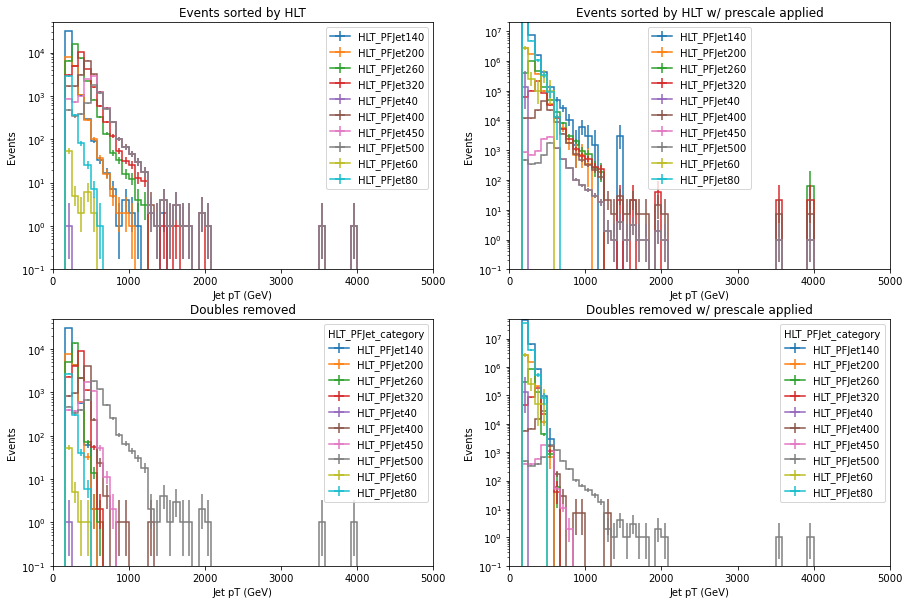

In [22]:
#### Sal pseudocode
# for path in prescale_2016: 
#     thesum = np.sum(events[path].array())
#     print("%20s : %10d" % (path, thesum) )

# def sortHLT_hists(prescale_dict):
%matplotlib inline
import matplotlib.pyplot as plt

HLT_masks = { }
HLT_masks_noDoubles = {}

keys = list(prescale_2016.keys())
# print(keys)
prescale_hist_16 = hist.Hist("Events",
                             hist.Cat("dataset", "Dataset"),
                             hist.Cat("HLT_cat", ""),
                             hist.Bin("jet_pt", "Jet pT (GeV)", 60, 0, 5000.),
                 )
prescale_hist_noDoubles_16 = hist.Hist("Events",
                             hist.Cat("dataset", "Dataset"),
                             hist.Cat("HLT_cat", "HLT_PFJet_category"),
                             hist.Bin("jet_pt", "Jet pT (GeV)", 60, 0, 5000.),
                 )
prescaleMask_2016 = np.ones_like(uprootevents["HLT_PFJet500"].array(), dtype = int)


##### make HLT_masks dictionary
for i in np.arange(len(keys))[::-1]:
    path = keys[i]
    HLT_masks[path] = uprootevents[path].array()
#     print(np.sum(HLT_masks[path]))
    
for i in np.arange(len(keys))[::-1]:
    path = keys[i]
    if i<len(keys)-1:
        for mask in HLT_masks.values():
            HLT_masks_noDoubles[path] = uprootevents[path].array() & ~mask
#             print(np.sum(HLT_masks_noDoubles[path]))

##### hardcode get rid of doubles
HLT_masks_noDoubles['HLT_PFJet500'] = HLT_masks['HLT_PFJet500']
HLT_masks_noDoubles['HLT_PFJet450'] = HLT_masks['HLT_PFJet450'] & ~HLT_masks['HLT_PFJet500']
HLT_masks_noDoubles['HLT_PFJet400'] = HLT_masks['HLT_PFJet400'] & ~HLT_masks['HLT_PFJet450'] & ~HLT_masks['HLT_PFJet500']
HLT_masks_noDoubles['HLT_PFJet320'] = HLT_masks['HLT_PFJet320'] & ~HLT_masks['HLT_PFJet400'] & ~HLT_masks['HLT_PFJet450'] & ~HLT_masks['HLT_PFJet500']
HLT_masks_noDoubles['HLT_PFJet260'] = HLT_masks['HLT_PFJet260'] & ~HLT_masks['HLT_PFJet320'] & ~HLT_masks['HLT_PFJet400'] & ~HLT_masks['HLT_PFJet450'] & ~HLT_masks['HLT_PFJet500']
HLT_masks_noDoubles['HLT_PFJet200'] = HLT_masks['HLT_PFJet200'] & ~HLT_masks['HLT_PFJet260'] & ~HLT_masks['HLT_PFJet320'] & ~HLT_masks['HLT_PFJet400'] & ~HLT_masks['HLT_PFJet450'] & ~HLT_masks['HLT_PFJet500']
HLT_masks_noDoubles['HLT_PFJet140'] = HLT_masks['HLT_PFJet140'] & ~HLT_masks['HLT_PFJet200'] & ~HLT_masks['HLT_PFJet260'] & ~HLT_masks['HLT_PFJet320'] & ~HLT_masks['HLT_PFJet400'] & ~HLT_masks['HLT_PFJet450'] & ~HLT_masks['HLT_PFJet500']
HLT_masks_noDoubles['HLT_PFJet80'] = HLT_masks['HLT_PFJet80'] & ~HLT_masks['HLT_PFJet140'] & ~HLT_masks['HLT_PFJet200'] & ~HLT_masks['HLT_PFJet260'] & ~HLT_masks['HLT_PFJet320'] & ~HLT_masks['HLT_PFJet400'] & ~HLT_masks['HLT_PFJet450'] & ~HLT_masks['HLT_PFJet500']
HLT_masks_noDoubles['HLT_PFJet60'] = HLT_masks['HLT_PFJet60'] & ~HLT_masks['HLT_PFJet80'] & ~HLT_masks['HLT_PFJet140'] & ~HLT_masks['HLT_PFJet200'] & ~HLT_masks['HLT_PFJet260'] & ~HLT_masks['HLT_PFJet320'] & ~HLT_masks['HLT_PFJet400'] & ~HLT_masks['HLT_PFJet450'] & ~HLT_masks['HLT_PFJet500']
HLT_masks_noDoubles['HLT_PFJet40'] = HLT_masks['HLT_PFJet40'] & ~HLT_masks['HLT_PFJet60'] & ~HLT_masks['HLT_PFJet80'] & ~HLT_masks['HLT_PFJet140'] & ~HLT_masks['HLT_PFJet200'] & ~HLT_masks['HLT_PFJet260'] & ~HLT_masks['HLT_PFJet320'] & ~HLT_masks['HLT_PFJet400'] & ~HLT_masks['HLT_PFJet450'] & ~HLT_masks['HLT_PFJet500']
for path in HLT_masks:
    print("# of ", path, " events with doubles ", np.sum(HLT_masks[path]), "\n")
    print("# of ", path, " events WITHOUT doubles", np.sum(HLT_masks_noDoubles[path]), "\n")
#### apply masks and fill hists
for path in keys[::-1]:
    if path in uprootevents.keys():
#         prescaleMask_2016 = np.where(uprootevents[path].array(), path, prescaleMask_2016)
        fatjets = events.FatJet[uprootevents[path].array()]
        fatjets_noDoubles = events.FatJet[HLT_masks_noDoubles[path]]
        prescale_hist_16.fill(dataset = "JetHT_2016", HLT_cat = path, jet_pt = ak.flatten(fatjets.pt))
        prescale_hist_noDoubles_16.fill(dataset = "JetHT_2016", HLT_cat = path, jet_pt = ak.flatten(fatjets_noDoubles.pt))
#         print(np.count_nonzero(prescaleMask_2016 == 'HLT_PFJet500'))    
    else:
        print(path, ' not in collection, moving to next path -- years are likely mismatched')
        
plt.rcParams['figure.facecolor']='white'
plt.rcParams["figure.figsize"] = (15,10)
fig, axs = plt.subplots(2, 2)

print("Check for none values", ak.any(ak.is_none(fatjets.pt, axis = -1)))
        
# print(np.isnan(prescale_hist_16))
    
hist.plot1d(prescale_hist_16.sum('dataset'), ax = axs[0,0], overlay='HLT_cat')
axs[0,0].set_yscale('log')
axs[0,0].set_ylim([1.0e-1, 5.0e4])
axs[0,0].set_title('Events sorted by HLT')

prescale_hist_16.scale(prescale_2016, axis = 'HLT_cat')

hist.plot1d(prescale_hist_16.sum('dataset'), ax = axs[0,1], overlay='HLT_cat')
axs[0,1].set_yscale('log')
axs[0,1].set_ylim([1.0e-1, 6.0e7])
axs[0,1].set_title('Events sorted by HLT w/ prescale applied')

hist.plot1d(prescale_hist_noDoubles_16.sum('dataset'), ax = axs[1,0], overlay='HLT_cat')
axs[1,0].set_yscale('log')
axs[1,0].set_ylim([1.0e-1, 5.0e4])
axs[1,0].set_title('Doubles removed')

prescale_hist_noDoubles_16.scale(prescale_2016, axis = 'HLT_cat')

hist.plot1d(prescale_hist_noDoubles_16.sum('dataset'), ax = axs[1,1], overlay='HLT_cat')
axs[1,1].set_yscale('log')
axs[1,1].set_ylim([1.0e-1, 6.0e7])
axs[1,1].set_title('Doubles removed w/ prescale applied')